## Clustering: Buscando un método que distinga loros

### Estudiantes: Edward García Hernández & Daniel Esteban Salazar Camacho
### Proyecto de clase #1 - Física computacional 2

#### Contenidos: `pca_eigenparrots.ipynb` y `clustering_parrots.ipynb`

**Objetivo**: Obtener un clasificador capaz de distinguir entre 4 géneros de aves de la familia *cacatuidae*: *cacatua*, *callocephalon*, *eolophus* y *nymphicus*.

# K-means
Se desarrolla el método de k-means para clasificar la base de datos de cuatro diferentes tipos de aves: Cacatua, Callocephalon, Eolophus y Nymphicus.

Hay en promedio 50 imágenes de 80x80 píxeles por cada familia de ave.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

Se creó un archivo *parrots.csv* que contiene: 214 filas donde cada una corresponde a la foto de un ave, 6400 columnas con la intensidad de cada pixel y una adicional llamada *Family* que contiene el nombre de los cuatro tipos de aves.

In [2]:
df_birds = pd.read_csv('parrots.csv').drop(['Unnamed: 0'], axis=1)
df_birds.shape

(214, 6401)

In [3]:
df_birds.head()

,Pixel 0,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Pixel 6391,Pixel 6392,Pixel 6393,Pixel 6394,Pixel 6395,Pixel 6396,Pixel 6397,Pixel 6398,Pixel 6399,Family
0,12.0,12.0,12.0,12.0,11.0,11.0,11.0,11.0,11.0,12.0,...,71.0,64.0,60.0,62.0,57.0,50.0,50.0,43.0,36.0,eolophus
1,133.0,125.0,111.0,101.0,105.0,115.0,119.0,113.0,108.0,112.0,...,174.0,175.0,180.0,186.0,174.0,165.0,169.0,180.0,185.0,eolophus
2,29.0,29.0,34.0,32.0,24.0,36.0,79.0,120.0,151.0,149.0,...,26.0,35.0,24.0,35.0,35.0,52.0,31.0,44.0,32.0,eolophus
3,142.0,144.0,144.0,141.0,136.0,132.0,129.0,128.0,127.0,128.0,...,137.0,128.0,121.0,106.0,135.0,152.0,146.0,131.0,132.0,eolophus
4,138.0,98.0,103.0,169.0,132.0,148.0,117.0,123.0,108.0,128.0,...,132.0,133.0,140.0,148.0,146.0,139.0,146.0,144.0,135.0,eolophus


# Distribución de los datos

In [4]:
from sklearn.decomposition import PCA

<AxesSubplot:xlabel='Family', ylabel='count'>

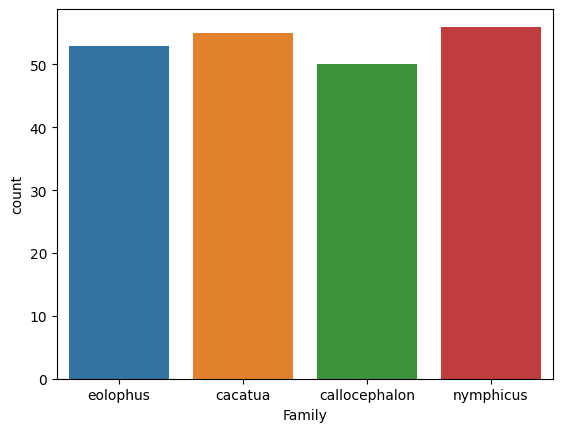

In [5]:
sns.countplot(x=df_birds['Family'])

# PCA 2D
Usando una análisis de componentes principales, se puede reducir la dimensionalidad del dataset a un plano 2D con el objetivo de visualizar la distribución de los datos.

In [6]:
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(df_birds.iloc[:, 1:-1].values)

([], [])

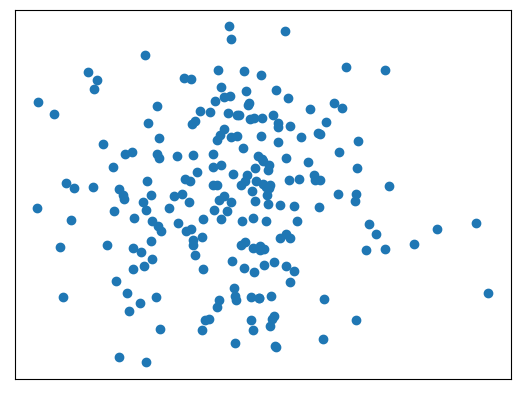

In [7]:
plt.scatter(X_pca2[:, 0], X_pca2[:, 1])
plt.xticks([])
plt.yticks([])

# PCA 3D

In [8]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(df_birds.iloc[:, 1:-1].values)

[]

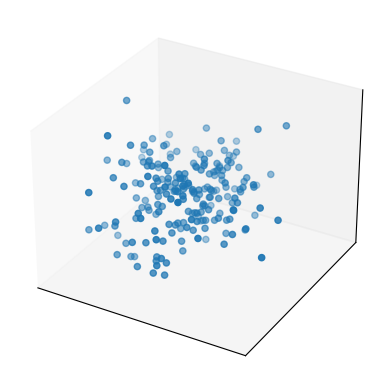

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2])
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.zaxis.set_ticks([])

# Clasificación k-means

In [10]:
from sklearn.cluster import KMeans

In [11]:
#Dataframe para entrenar el modelo de k-means: df_birds_k
df_birds_k = df_birds.iloc[:,:].drop(['Family'], axis = 1)
df_birds_k.head()

,Pixel 0,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Pixel 6390,Pixel 6391,Pixel 6392,Pixel 6393,Pixel 6394,Pixel 6395,Pixel 6396,Pixel 6397,Pixel 6398,Pixel 6399
0,12.0,12.0,12.0,12.0,11.0,11.0,11.0,11.0,11.0,12.0,...,74.0,71.0,64.0,60.0,62.0,57.0,50.0,50.0,43.0,36.0
1,133.0,125.0,111.0,101.0,105.0,115.0,119.0,113.0,108.0,112.0,...,177.0,174.0,175.0,180.0,186.0,174.0,165.0,169.0,180.0,185.0
2,29.0,29.0,34.0,32.0,24.0,36.0,79.0,120.0,151.0,149.0,...,33.0,26.0,35.0,24.0,35.0,35.0,52.0,31.0,44.0,32.0
3,142.0,144.0,144.0,141.0,136.0,132.0,129.0,128.0,127.0,128.0,...,134.0,137.0,128.0,121.0,106.0,135.0,152.0,146.0,131.0,132.0
4,138.0,98.0,103.0,169.0,132.0,148.0,117.0,123.0,108.0,128.0,...,115.0,132.0,133.0,140.0,148.0,146.0,139.0,146.0,144.0,135.0


In [12]:
kmeans = KMeans(n_clusters=4, init = 'k-means++', random_state = 15)
kmeans.fit(df_birds_k.iloc[:, :])
labels = kmeans.labels_
labels

array([0, 1, 1, 3, 2, 3, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 1, 3, 1, 1, 2,
       3, 1, 1, 2, 3, 3, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2,
       1, 1, 1, 1, 2, 3, 2, 1, 3, 3, 2, 3, 3, 2, 2, 0, 3, 3, 0, 3, 3, 0,
       3, 1, 0, 2, 0, 1, 3, 0, 3, 3, 3, 3, 1, 3, 0, 3, 0, 0, 3, 3, 3, 3,
       3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 1, 1,
       0, 1, 1, 1, 0, 2, 3, 1, 2, 0, 0, 3, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 3, 3, 0, 1, 1, 1, 0, 3, 0, 0, 2, 2, 1, 2, 2, 3, 3,
       2, 0, 3, 0, 0, 0, 3, 2, 0, 3, 2, 1, 0, 0, 1, 0, 1, 1, 1, 2, 0, 2,
       0, 0, 0, 1, 1, 2, 3, 2, 3, 1, 0, 3, 2, 0, 1, 2])

In [13]:
#Se agrega cluster al dataframe original df_birds
df_birds['Cluster'] = labels
df_birds.head()

,Pixel 0,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Pixel 6392,Pixel 6393,Pixel 6394,Pixel 6395,Pixel 6396,Pixel 6397,Pixel 6398,Pixel 6399,Family,Cluster
0,12.0,12.0,12.0,12.0,11.0,11.0,11.0,11.0,11.0,12.0,...,64.0,60.0,62.0,57.0,50.0,50.0,43.0,36.0,eolophus,0
1,133.0,125.0,111.0,101.0,105.0,115.0,119.0,113.0,108.0,112.0,...,175.0,180.0,186.0,174.0,165.0,169.0,180.0,185.0,eolophus,1
2,29.0,29.0,34.0,32.0,24.0,36.0,79.0,120.0,151.0,149.0,...,35.0,24.0,35.0,35.0,52.0,31.0,44.0,32.0,eolophus,1
3,142.0,144.0,144.0,141.0,136.0,132.0,129.0,128.0,127.0,128.0,...,128.0,121.0,106.0,135.0,152.0,146.0,131.0,132.0,eolophus,3
4,138.0,98.0,103.0,169.0,132.0,148.0,117.0,123.0,108.0,128.0,...,133.0,140.0,148.0,146.0,139.0,146.0,144.0,135.0,eolophus,2


In [14]:
#Se eliminan las 6400 columnas correspondientes a la intensidad de cada pixel
for i in range(0, 6400, 1):
    col_name = 'Pixel {}'.format(i)
    df_birds = df_birds.drop([col_name], axis=1)
df_birds

,Family,Cluster
0,eolophus,0
1,eolophus,1
2,eolophus,1
3,eolophus,3
4,eolophus,2
...,...,...
209,nymphicus,3
210,nymphicus,2
211,nymphicus,0
212,nymphicus,1


In [15]:
counts = df_birds.groupby(['Family', 'Cluster']).size().reset_index(name='Counts')
counts

,Family,Cluster,Counts
0,cacatua,0,20
1,cacatua,1,3
2,cacatua,2,4
3,cacatua,3,28
4,callocephalon,0,16
5,callocephalon,1,28
6,callocephalon,2,4
7,callocephalon,3,2
8,eolophus,0,3
9,eolophus,1,30


In [16]:
pivot = counts.pivot_table(values='Counts', index='Cluster', columns='Family')
pivot

Family,cacatua,callocephalon,eolophus,nymphicus
Cluster,,,,
0,20,16,3,18
1,3,28,30,14
2,4,4,11,13
3,28,2,9,11


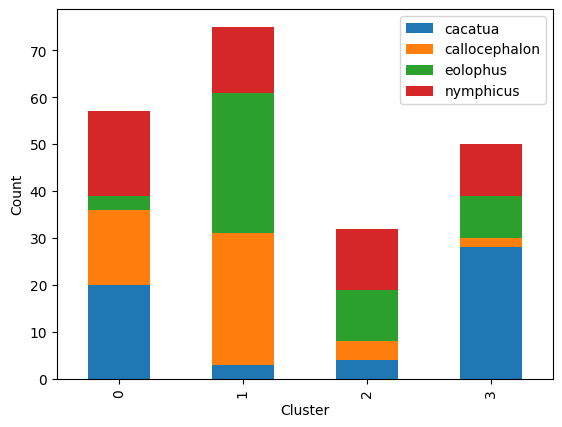

In [17]:
pivot.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend()

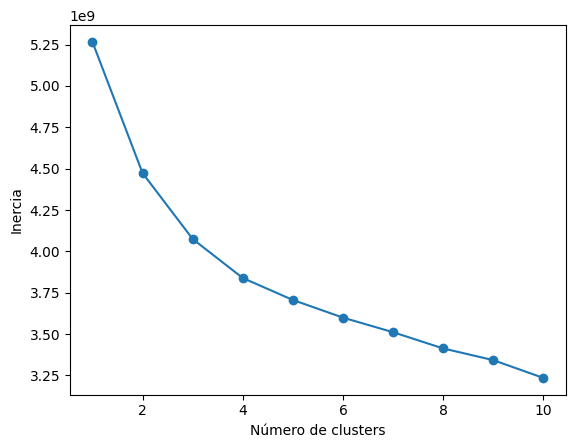

In [18]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(df_birds_k.iloc[:, :])
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Número de clusters')
plt.ylabel('Inercia');

# K-means con una base de datos de dimensionalidad reducida por PCA

In [19]:
#Dataframe con PCA para k-means: df_birds_pca
df_birds_pca = pd.read_csv('parrots_pca.csv').drop(['Unnamed: 0'], axis=1)
df_birds_pca.shape

(214, 31)

In [20]:
df_birds_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Family
0,1.601291,2.329534,0.005726,1.366252,-1.172566,-0.126284,0.932326,-0.276972,-0.947014,0.239259,...,0.147733,0.197928,-0.436914,1.206776,-1.410807,0.730585,0.152368,-0.803295,-0.188634,eolophus
1,-0.682969,0.016846,1.320832,0.894798,-0.003113,-0.151692,0.440422,-0.183686,-0.010182,0.605713,...,0.517310,-1.416762,-0.857841,0.651105,-1.557589,-0.868205,-0.736874,-1.194047,-0.422090,eolophus
2,2.146537,0.011276,-0.207720,-0.196608,2.490061,1.692402,1.138489,3.449421,1.972530,-1.222344,...,-0.450701,-0.841923,0.538859,0.204729,-0.611617,-0.431488,-0.341640,0.545383,-0.106532,eolophus
3,0.064399,1.676645,-0.744784,0.451103,0.470122,0.002546,1.320514,0.135627,0.473963,-0.952396,...,-0.161300,0.928825,-0.817578,0.657474,1.199480,-0.403599,0.124982,-0.639910,0.223200,eolophus
4,-1.211499,-0.736662,-0.719914,-0.849571,-0.762908,-0.753624,-0.201133,2.127127,0.206353,-0.487150,...,0.329522,0.986694,0.728862,-1.629999,-1.494298,1.154967,0.101795,0.571842,-1.143988,eolophus


In [21]:
#Dataframe con PCA para entrenar k-means: df_birds_pca_k 
df_birds_pca_k = df_birds_pca.drop(['Family'], axis = 1)
df_birds_pca_k.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.601291,2.329534,0.005726,1.366252,-1.172566,-0.126284,0.932326,-0.276972,-0.947014,0.239259,...,0.125566,0.147733,0.197928,-0.436914,1.206776,-1.410807,0.730585,0.152368,-0.803295,-0.188634
1,-0.682969,0.016846,1.320832,0.894798,-0.003113,-0.151692,0.440422,-0.183686,-0.010182,0.605713,...,-0.636645,0.517310,-1.416762,-0.857841,0.651105,-1.557589,-0.868205,-0.736874,-1.194047,-0.422090
2,2.146537,0.011276,-0.207720,-0.196608,2.490061,1.692402,1.138489,3.449421,1.972530,-1.222344,...,-0.192345,-0.450701,-0.841923,0.538859,0.204729,-0.611617,-0.431488,-0.341640,0.545383,-0.106532
3,0.064399,1.676645,-0.744784,0.451103,0.470122,0.002546,1.320514,0.135627,0.473963,-0.952396,...,0.549725,-0.161300,0.928825,-0.817578,0.657474,1.199480,-0.403599,0.124982,-0.639910,0.223200
4,-1.211499,-0.736662,-0.719914,-0.849571,-0.762908,-0.753624,-0.201133,2.127127,0.206353,-0.487150,...,-0.352217,0.329522,0.986694,0.728862,-1.629999,-1.494298,1.154967,0.101795,0.571842,-1.143988


In [22]:
kmeans = KMeans(n_clusters=4, init = 'k-means++', random_state = 12)
kmeans.fit(df_birds_pca_k.iloc[:, :])
labels = kmeans.labels_
labels

array([1, 1, 2, 1, 0, 3, 0, 1, 1, 3, 1, 1, 0, 3, 0, 0, 2, 1, 2, 2, 0, 0,
       2, 2, 1, 3, 0, 0, 2, 1, 0, 1, 1, 1, 1, 3, 0, 0, 1, 2, 0, 0, 0, 1,
       1, 1, 3, 2, 2, 0, 2, 3, 0, 1, 2, 1, 2, 1, 1, 3, 0, 1, 0, 1, 0, 0,
       0, 1, 3, 2, 3, 2, 1, 0, 1, 3, 1, 1, 0, 2, 1, 1, 3, 0, 0, 1, 3, 1,
       3, 2, 1, 0, 2, 0, 2, 3, 1, 1, 0, 1, 0, 0, 0, 3, 3, 1, 2, 1, 1, 1,
       2, 0, 1, 0, 1, 2, 3, 1, 3, 1, 1, 3, 0, 0, 3, 1, 0, 1, 1, 1, 3, 0,
       0, 3, 1, 2, 1, 1, 0, 3, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 3, 1, 0,
       1, 1, 0, 1, 0, 3, 0, 0, 2, 3, 0, 2, 1, 2, 3, 3, 1, 0, 0, 1, 2, 2,
       1, 2, 1, 1, 0, 1, 0, 2, 3, 0, 1, 2, 1, 1, 3, 0, 0, 2, 0, 0, 3, 1,
       1, 3, 0, 2, 3, 1, 2, 0, 2, 2, 2, 0, 0, 0, 3, 2])

In [23]:
#Se crea la columna Cluster en el dataframe original con PCA para visualizar la correspondencia entre Family y el Cluster 
df_birds_pca['Cluster'] = labels
df_birds_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,Family,Cluster
0,1.601291,2.329534,0.005726,1.366252,-1.172566,-0.126284,0.932326,-0.276972,-0.947014,0.239259,...,0.197928,-0.436914,1.206776,-1.410807,0.730585,0.152368,-0.803295,-0.188634,eolophus,1
1,-0.682969,0.016846,1.320832,0.894798,-0.003113,-0.151692,0.440422,-0.183686,-0.010182,0.605713,...,-1.416762,-0.857841,0.651105,-1.557589,-0.868205,-0.736874,-1.194047,-0.422090,eolophus,1
2,2.146537,0.011276,-0.207720,-0.196608,2.490061,1.692402,1.138489,3.449421,1.972530,-1.222344,...,-0.841923,0.538859,0.204729,-0.611617,-0.431488,-0.341640,0.545383,-0.106532,eolophus,2
3,0.064399,1.676645,-0.744784,0.451103,0.470122,0.002546,1.320514,0.135627,0.473963,-0.952396,...,0.928825,-0.817578,0.657474,1.199480,-0.403599,0.124982,-0.639910,0.223200,eolophus,1
4,-1.211499,-0.736662,-0.719914,-0.849571,-0.762908,-0.753624,-0.201133,2.127127,0.206353,-0.487150,...,0.986694,0.728862,-1.629999,-1.494298,1.154967,0.101795,0.571842,-1.143988,eolophus,0


In [24]:
#Se eliminan las 30 columnas correspondientes a los PCA
for i in range(0, 30, 1):
    col_name = '{}'.format(i)
    df_birds_pca = df_birds_pca.drop([col_name], axis=1)
df_birds_pca

,Family,Cluster
0,eolophus,1
1,eolophus,1
2,eolophus,2
3,eolophus,1
4,eolophus,0
...,...,...
209,nymphicus,0
210,nymphicus,0
211,nymphicus,0
212,nymphicus,3


In [25]:
counts = df_birds_pca.groupby(['Family', 'Cluster']).size().reset_index(name='Counts')
counts

,Family,Cluster,Counts
0,cacatua,0,15
1,cacatua,1,21
2,cacatua,2,9
3,cacatua,3,10
4,callocephalon,0,15
5,callocephalon,1,23
6,callocephalon,2,4
7,callocephalon,3,8
8,eolophus,0,17
9,eolophus,1,18


In [26]:
pivot = counts.pivot_table(values='Counts', index='Cluster', columns='Family')
pivot

Family,cacatua,callocephalon,eolophus,nymphicus
Cluster,,,,
0,15,15,17,18
1,21,23,18,13
2,9,4,11,15
3,10,8,7,10


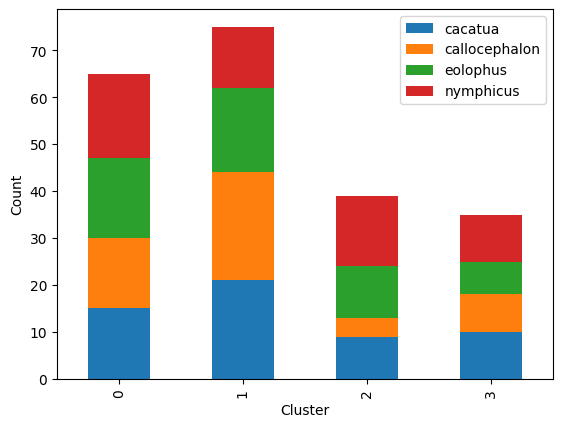

In [27]:
pivot.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend()

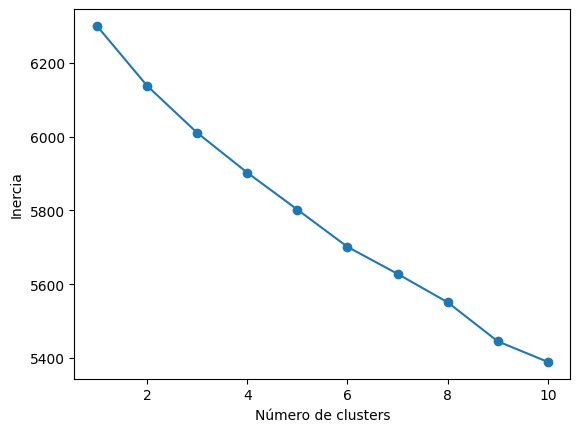

In [28]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(df_birds_pca_k.iloc[:, :])
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Número de clusters')
plt.ylabel('Inercia');

# Mean Shift

In [29]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [30]:
X_ms = df_birds_pca_k.iloc[:,:].values

bandwidth = estimate_bandwidth(X_ms, quantile=0.1, n_samples=3000)
bandwidth

6.249607940561978

In [31]:
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X_ms)

MeanShift(bandwidth=6.249607940561978)

In [32]:
labels = ms.labels_
n_clusters = len(set(labels))
n_clusters

24

In [33]:
labels

array([ 0,  0,  4,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 13,  0,
        0,  0,  0,  0,  0,  0,  0,  6,  3,  0, 10,  0,  0,  0, 21, 16,  0,
        0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 22,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0, 15,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 18, 19, 17,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,
       14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0, 23,  0,  0,  0,
       11,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [34]:
#Se añade la columna Cluster, que contiene los labels del método Mean Shift, en el dataframe de los datos procesados por PCA
df_birds_pca_ms = df_birds_pca_k.iloc[:,:]
df_birds_pca_ms['Cluster']  = labels
df_birds_pca_ms.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Cluster
0,1.601291,2.329534,0.005726,1.366252,-1.172566,-0.126284,0.932326,-0.276972,-0.947014,0.239259,...,0.147733,0.197928,-0.436914,1.206776,-1.410807,0.730585,0.152368,-0.803295,-0.188634,0
1,-0.682969,0.016846,1.320832,0.894798,-0.003113,-0.151692,0.440422,-0.183686,-0.010182,0.605713,...,0.517310,-1.416762,-0.857841,0.651105,-1.557589,-0.868205,-0.736874,-1.194047,-0.422090,0
2,2.146537,0.011276,-0.207720,-0.196608,2.490061,1.692402,1.138489,3.449421,1.972530,-1.222344,...,-0.450701,-0.841923,0.538859,0.204729,-0.611617,-0.431488,-0.341640,0.545383,-0.106532,4
3,0.064399,1.676645,-0.744784,0.451103,0.470122,0.002546,1.320514,0.135627,0.473963,-0.952396,...,-0.161300,0.928825,-0.817578,0.657474,1.199480,-0.403599,0.124982,-0.639910,0.223200,0
4,-1.211499,-0.736662,-0.719914,-0.849571,-0.762908,-0.753624,-0.201133,2.127127,0.206353,-0.487150,...,0.329522,0.986694,0.728862,-1.629999,-1.494298,1.154967,0.101795,0.571842,-1.143988,0


Text(0.5, 1.0, 'Mean Shift Clustering Results')

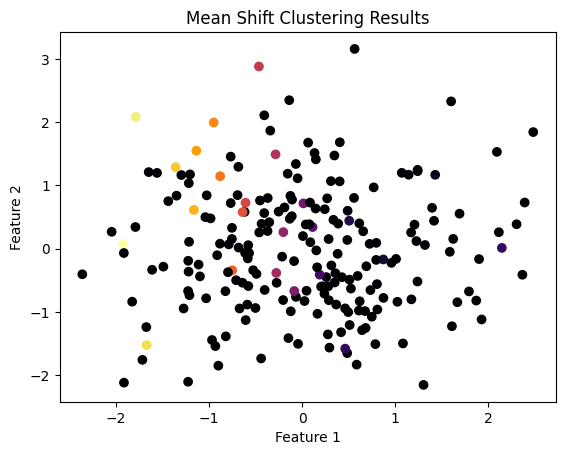

In [35]:
plt.scatter(X_ms[:,0], X_ms[:,1], c=labels, cmap='inferno')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Mean Shift Clustering Results')

Para visualizar la cantidad de aves de cada especie en cada uno de los 17 clusters se añade la columna *Family*

In [36]:
df_birds_pca_ms['Family'] = df_birds['Family']
df_birds_pca_ms.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,Cluster,Family
0,1.601291,2.329534,0.005726,1.366252,-1.172566,-0.126284,0.932326,-0.276972,-0.947014,0.239259,...,0.197928,-0.436914,1.206776,-1.410807,0.730585,0.152368,-0.803295,-0.188634,0,eolophus
1,-0.682969,0.016846,1.320832,0.894798,-0.003113,-0.151692,0.440422,-0.183686,-0.010182,0.605713,...,-1.416762,-0.857841,0.651105,-1.557589,-0.868205,-0.736874,-1.194047,-0.422090,0,eolophus
2,2.146537,0.011276,-0.207720,-0.196608,2.490061,1.692402,1.138489,3.449421,1.972530,-1.222344,...,-0.841923,0.538859,0.204729,-0.611617,-0.431488,-0.341640,0.545383,-0.106532,4,eolophus
3,0.064399,1.676645,-0.744784,0.451103,0.470122,0.002546,1.320514,0.135627,0.473963,-0.952396,...,0.928825,-0.817578,0.657474,1.199480,-0.403599,0.124982,-0.639910,0.223200,0,eolophus
4,-1.211499,-0.736662,-0.719914,-0.849571,-0.762908,-0.753624,-0.201133,2.127127,0.206353,-0.487150,...,0.986694,0.728862,-1.629999,-1.494298,1.154967,0.101795,0.571842,-1.143988,0,eolophus


In [37]:
#Se eliminan las 30 columnas de los PCA
for i in range(0, 30, 1):
    col_name = '{}'.format(i)
    df_birds_pca_ms = df_birds_pca_ms.drop([col_name], axis=1)
df_birds_pca_ms

,Cluster,Family
0,0,eolophus
1,0,eolophus
2,4,eolophus
3,0,eolophus
4,0,eolophus
...,...,...
209,0,nymphicus
210,0,nymphicus
211,0,nymphicus
212,0,nymphicus


In [38]:
counts = df_birds_pca_ms.groupby(['Family', 'Cluster']).size().reset_index(name='Counts')
counts

,Family,Cluster,Counts
0,cacatua,0,49
1,cacatua,2,1
2,cacatua,15,1
3,cacatua,17,1
4,cacatua,18,1
5,cacatua,19,1
6,cacatua,22,1
7,callocephalon,0,45
8,callocephalon,1,1
9,callocephalon,5,1


In [39]:
pivot = counts.pivot_table(values='Counts', index='Cluster', columns='Family')
pivot

Family,cacatua,callocephalon,eolophus,nymphicus
Cluster,,,,
0,49.0,45.0,44.0,52.0
1,NaN,1.0,NaN,NaN
2,1.0,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN
4,NaN,NaN,1.0,1.0
5,NaN,1.0,NaN,NaN
6,NaN,NaN,1.0,NaN
7,NaN,NaN,1.0,NaN
8,NaN,1.0,NaN,NaN


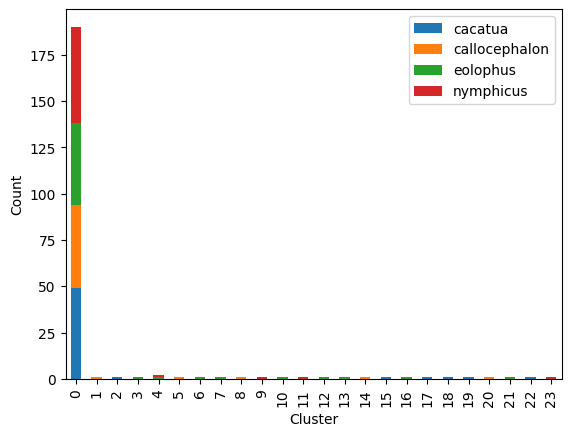

In [40]:
pivot.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend()

# Método DBSCAN

In [41]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [42]:
df_birds_DBSCAN = pd.read_csv('Parrots.csv').drop(['Unnamed: 0', 'Family'], axis = 1)
df_birds_DBSCAN.head()

,Pixel 0,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Pixel 6390,Pixel 6391,Pixel 6392,Pixel 6393,Pixel 6394,Pixel 6395,Pixel 6396,Pixel 6397,Pixel 6398,Pixel 6399
0,12.0,12.0,12.0,12.0,11.0,11.0,11.0,11.0,11.0,12.0,...,74.0,71.0,64.0,60.0,62.0,57.0,50.0,50.0,43.0,36.0
1,133.0,125.0,111.0,101.0,105.0,115.0,119.0,113.0,108.0,112.0,...,177.0,174.0,175.0,180.0,186.0,174.0,165.0,169.0,180.0,185.0
2,29.0,29.0,34.0,32.0,24.0,36.0,79.0,120.0,151.0,149.0,...,33.0,26.0,35.0,24.0,35.0,35.0,52.0,31.0,44.0,32.0
3,142.0,144.0,144.0,141.0,136.0,132.0,129.0,128.0,127.0,128.0,...,134.0,137.0,128.0,121.0,106.0,135.0,152.0,146.0,131.0,132.0
4,138.0,98.0,103.0,169.0,132.0,148.0,117.0,123.0,108.0,128.0,...,115.0,132.0,133.0,140.0,148.0,146.0,139.0,146.0,144.0,135.0


In [43]:
X_db = df_birds_DBSCAN.iloc[:,:].values

Se hace un k vecinos cercanos para que, por el método del codo, hallar el valor apropiado para el kwargs *eps* en el método **DBSCAN**

In [44]:
k = 4 
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(X_db)
distances, indices = nbrs.kneighbors(X_db)

Text(0, 0.5, 'Distancia al k-ésimo vecino')

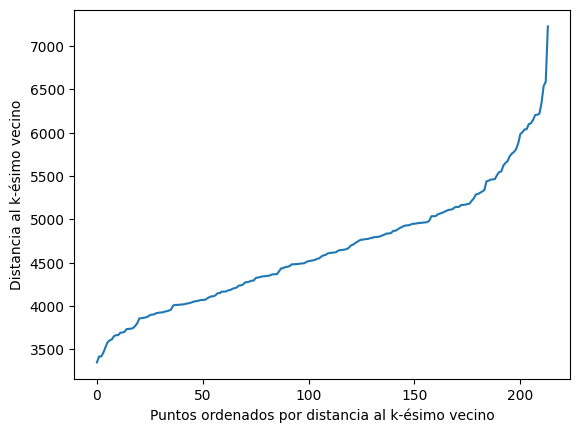

In [45]:
distances = np.sort(distances[:, k-1], axis=0)
plt.plot(distances)
plt.xlabel("Puntos ordenados por distancia al k-ésimo vecino")
plt.ylabel("Distancia al k-ésimo vecino")

In [46]:
dbscan = DBSCAN(eps=0.5, min_samples=3800).fit(X_db)
labels = dbscan.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [47]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [48]:
print("Número estimado de clusters: %d" % n_clusters_)
print("Número estimado de puntos de ruido: %d" % n_noise_)

Número estimado de clusters: 0
Número estimado de puntos de ruido: 214


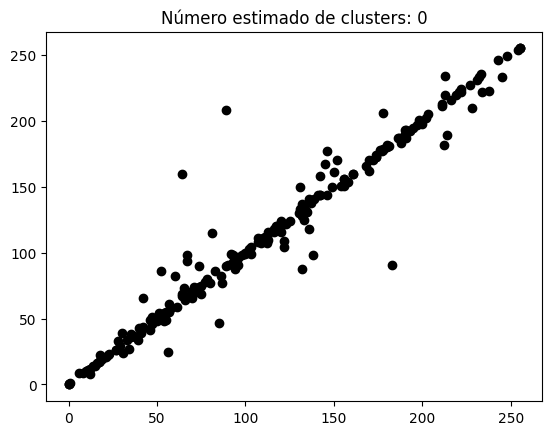

In [49]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # El color negro es usado para el ruido.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X_db[class_member_mask & core_samples_mask]

    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=14,)

    xy = X_db[class_member_mask & ~core_samples_mask]

    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=6,)

plt.title(f"Número estimado de clusters: {n_clusters_}")
plt.show()

# DBSCAN con una base de datos tratada por PCA

In [50]:
df_birds_DBSCAN_pca = pd.read_csv('parrots_pca.csv').drop(['Unnamed: 0', 'Family'], axis = 1)
df_birds_DBSCAN_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.601291,2.329534,0.005726,1.366252,-1.172566,-0.126284,0.932326,-0.276972,-0.947014,0.239259,...,0.125566,0.147733,0.197928,-0.436914,1.206776,-1.410807,0.730585,0.152368,-0.803295,-0.188634
1,-0.682969,0.016846,1.320832,0.894798,-0.003113,-0.151692,0.440422,-0.183686,-0.010182,0.605713,...,-0.636645,0.517310,-1.416762,-0.857841,0.651105,-1.557589,-0.868205,-0.736874,-1.194047,-0.422090
2,2.146537,0.011276,-0.207720,-0.196608,2.490061,1.692402,1.138489,3.449421,1.972530,-1.222344,...,-0.192345,-0.450701,-0.841923,0.538859,0.204729,-0.611617,-0.431488,-0.341640,0.545383,-0.106532
3,0.064399,1.676645,-0.744784,0.451103,0.470122,0.002546,1.320514,0.135627,0.473963,-0.952396,...,0.549725,-0.161300,0.928825,-0.817578,0.657474,1.199480,-0.403599,0.124982,-0.639910,0.223200
4,-1.211499,-0.736662,-0.719914,-0.849571,-0.762908,-0.753624,-0.201133,2.127127,0.206353,-0.487150,...,-0.352217,0.329522,0.986694,0.728862,-1.629999,-1.494298,1.154967,0.101795,0.571842,-1.143988


In [51]:
X_db_pca = df_birds_DBSCAN_pca.iloc[:,1:].values
X_db_pca.shape

(214, 29)

In [52]:
k = 4 
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(X_db_pca)
distances, indices = nbrs.kneighbors(X_db_pca)

Text(0, 0.5, 'Distancia al k-ésimo vecino')

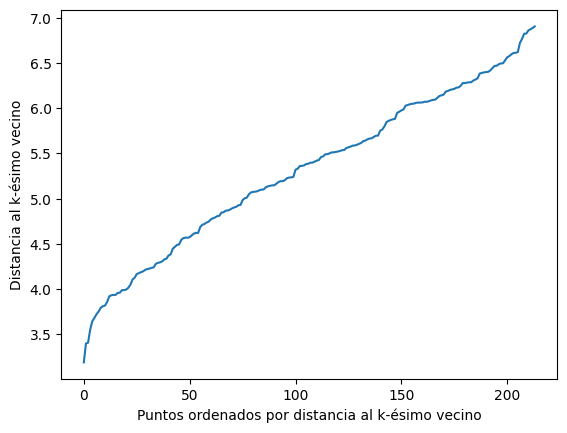

In [53]:
distances = np.sort(distances[:, k-1], axis=0)
plt.plot(distances)
plt.xlabel("Puntos ordenados por distancia al k-ésimo vecino")
plt.ylabel("Distancia al k-ésimo vecino")

In [54]:
dbscan_pca = DBSCAN(eps=0.5, min_samples=4).fit(X_db_pca)
labels = dbscan_pca.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [55]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [56]:
print("Número estimado de clusters: %d" % n_clusters_)
print("Número estimado de puntos de ruido: %d" % n_noise_)

Número estimado de clusters: 0
Número estimado de puntos de ruido: 214


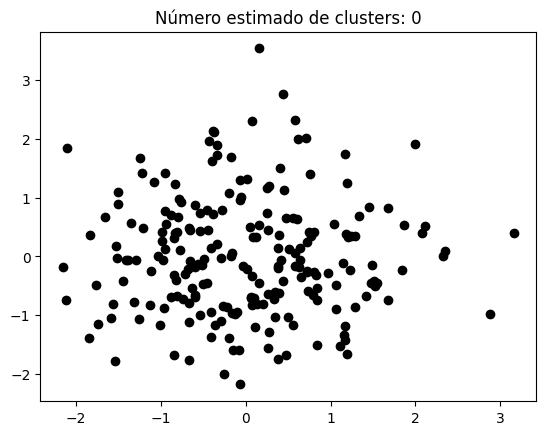

In [57]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Los puntos negros son usados para representar ruido.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X_db_pca[class_member_mask & core_samples_mask]
    
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=14,)

    xy = X_db_pca[class_member_mask & ~core_samples_mask]
    
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=6,)

plt.title(f"Número estimado de clusters: {n_clusters_}")
plt.show()